# Análise Exploratória
Na minha opinião, a análise exploratória é uma das fases mais importantes de qualquer projeto que lide com dados. Aqui o objetivo é entender o contexto em que trabalharemos e como são os dados que temos que explorar, para termos toda uma documentação que precisaremos para criar os próximos algoritmos, mesmo os de Machine Learning. Acredito que mesmo nesta fase já podemos encontrar alguns Insights.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/E-commerce%20Customer%20Data%20For%20Behavior%20Analysis/Image/Copertina.png" alt="ebac-logo">

---

# **Scituffy** | Python: Brazilian E-Commerce Public Dataset by Olist
Fiz uma análise das vendas de um E-Commerce para entender melhor como são seus clientes. O conjunto de dados contém informações sobre 100.000 pedidos de 2016 a 2018 feitos em vários mercados no Brasil. Seus recursos permitem visualizar um pedido em múltiplas dimensões: desde status do pedido, preço, desempenho de pagamento e transporte, localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes

**Data Science** Portfóli

[Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

## O que você vai encontrar neste notebook? 👋

A ciência sempre me fascinou pelo fato de podermos descobrir coisas novas. E foi por essa vontade de fazer descobertas que me tornei Data Scientist, para resolver problemas reais e fazer as tais descobertas.

#### - *Contexto os dados*
Este conjunto de dados foi generosamente cedido pela Olist, o maior armazém do mercado brasileiro. Olist conecta pequenas empresas de todo o Brasil a canais de forma integrada e com um único contrato. Esses comerciantes podem vender seus produtos através da Olist Store e enviá-los diretamente aos clientes usando os parceiros logísticos da Olist. Para saber mais, visite nosso site: [www.olist.com](https://www.olist.com/)

Depois que um cliente compra o produto na Olist Store, o vendedor recebe uma notificação para atender o pedido. Assim que o cliente recebe o produto, ou vence a data estimada de entrega, o cliente recebe por e-mail uma pesquisa de satisfação onde pode dar uma nota sobre a experiência de compra e escrever alguns comentários.

Este é um conjunto de dados públicos de comércio eletrônico brasileiro de pedidos feitos na Olist Store. O conjunto de dados contém informações sobre 100.000 pedidos de 2016 a 2018 feitos em vários mercados no Brasil. Seus recursos permitem visualizar um pedido em múltiplas dimensões: desde status do pedido, preço, desempenho de pagamento e transporte, localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes. Também publicamos um conjunto de dados de geolocalização que correlaciona códigos postais brasileiros com coordenadas lat/lng.

#### - *Estrutura dos dados*

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/E-commerce%20Customer%20Data%20For%20Behavior%20Analysis/Image/Schema.png" alt="ebac-logo">

- `Informações da coluna:`

| Coluna  | Descrição |
| ------- | --------- |
| ID do cliente | Um identificador exclusivo para cada cliente. |
| Nome do cliente | O nome do cliente (gerado pelo Faker) |
| Idade do cliente | A idade do cliente (gerada pelo Faker) |
| Gênero | O gênero do cliente (gerado por Faker)    |
| Data da compra | A data de cada compra feita pelo cliente |
| Categoria do produto | A categoria ou o tipo do produto adquirido |
| Preço do produto | O preço do produto adquirido |
| Quantidade | A quantidade do produto comprado |
| Valor total da compra | O valor total gasto pelo cliente em cada transação |
| Método de pagamento | O método de pagamento usado pelo cliente (por exemplo, cartão de crédito, PayPal) |
| Devoluções | Se o cliente devolveu algum produto do pedido (binário: 0 para nenhuma devolução, 1 para devolução) |
| Churn | Uma coluna binária que indica se o cliente agitou (0 para retido, 1 para agitado) |

> Os dados foram fornecidos pelo [Kaggle](https://www.kaggle.com/datasets/shriyashjagtap/e-commerce-customer-for-behavior-analysis)

## 🔥 Vamos começar!!!

### **`Tópicos`**

<ol type="1">
  <li>Carregamento dos dados e dos pacotes</li>
  <li>Entender a estrutura</li>
  <li>Tratamemto</li>
  <li>Atributos e colunas</li>
  <li>Métricas e visualização</li>
</ol>

##### Abaixo você encontrará algumas insights e códigos sobre esses dados. Mas se quiser acessar um material somente com os insights, baixe o [PDF](https://drive.google.com/file/d/1fK1ocDTSzMpDhKy8jJ1yU3LN1Tm-gxcV/view?usp=drivesdk)

---

## 1.0 Carregamento dos dados e dos pacotes

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from main import GuidaDataframe

In [3]:
df = pd.read_csv("Data\ecommerce_customer_data_large.csv")
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


### 1.1 Estrutura dos dados
Entender a estrutura dos dados significa saber quantas Linhas e Colunas existem, se há dados duplicados ou não, o Nome das colunas, seu tipo, sua quantidade de categorias, quantos dados nulos e a porcentagem deles.

- Linhas e colunas

In [4]:
linhas, colunas = df.shape
print(f'Temos {linhas} linhas e {colunas} colunas.')

Temos 250000 linhas e 13 colunas.


- Linhas duplicadas

In [5]:
df.drop_duplicates(inplace=True)

#### `Schema`
Agora vamos ver com mais detalhes como é a estrutura das colunas

In [6]:
gd = GuidaDataframe(df)
gd.esplorazione()

Tabela Exploratória
Nesses dados temos 250.000 linhas e 13 colunas.
Consumo de memória: 95.43Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,Customer ID,numpy.int64,49661,0,0.0,2.0
2,Purchase Date,str,249728,0,0.0,18.0
3,Product Category,str,4,0,0.0,15.0
4,Product Price,numpy.int64,491,0,0.0,2.0
5,Quantity,numpy.int64,5,0,0.0,2.0
6,Total Purchase Amount,numpy.int64,5245,0,0.0,2.0
7,Payment Method,str,3,0,0.0,15.0
8,Customer Age,numpy.int64,53,0,0.0,2.0
9,Returns,numpy.float64,2,47382,19.0,2.0
10,Customer Name,str,39878,0,0.0,17.0


## 2.0 Tratamento dos dados

O DataFrame apresenta problemas em algumas colunas. Então agora vamos corrigi-los!

### Reparando as colunas
Colunas como `Product Category`, `Payment Method`, `Customer Name` e `Gender` são strings, isso torna os dados mais pesados ​​​​e pode tornar o algoritmo mais lento. Então agora vamos transformá-los em `category` para que seja fácil carregá-los. E como `Purchase Date` até agora também é uma string, precisamos transformá-la em `datetime`.

- Colunas de data

In [7]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [8]:
min = str(df['Purchase Date'].min())
max = str(df['Purchase Date'].max())
print(f'Os dados variam de {min} a {max}')

Os dados variam de 2020-01-01 00:07:26 a 2023-09-13 18:42:49


- Colunas categóricas

In [9]:
colunas_categoricas = df.select_dtypes('object').columns.to_list()

for coluna in colunas_categoricas:
    df[coluna] = df[coluna].astype('category')
    print(coluna)
    print(f'{df[coluna].unique()}\n')

Product Category
['Home', 'Electronics', 'Books', 'Clothing']
Categories (4, object): ['Books', 'Clothing', 'Electronics', 'Home']

Payment Method
['PayPal', 'Credit Card', 'Cash']
Categories (3, object): ['Cash', 'Credit Card', 'PayPal']

Customer Name
['John Rivera', 'Lauren Johnson', 'Carol Allen', 'Curtis Smith', 'Jose Green', ..., 'Alexis Nelson', 'Dana Brown', 'Gabriel Williams', 'Barry Foster', 'Angela Norton']
Length: 39878
Categories (39878, object): ['Aaron Alexander', 'Aaron Archer', 'Aaron Armstrong', 'Aaron Avery', ..., 'Zoe Torres', 'Zoe Walker', 'Zoe Watson', 'Zoe Young']

Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']



Entendemos que os nomes dos clientes podem se repetir. Então eles fazem mais de uma compra

In [10]:
df['Customer Name'].value_counts()

Customer Name
Michael Johnson     119
Michael Smith       116
Michael Brown       106
Michael Jones        94
James Smith          93
                   ... 
James Cherry          1
Valerie Hamilton      1
James Caldwell        1
Luis Andrews          1
Zoe Young             1
Name: count, Length: 39878, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  category      
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  category      
 7   Customer Age           250000 non-null  int64         
 8   Returns                202618 non-null  float64       
 9   Customer Name          250000 non-null  category      
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  category      
 12  Churn                  250000 non-null  int6

### Dados faltantes

In [12]:
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

- Distribuição de dados faltantes

<Axes: >

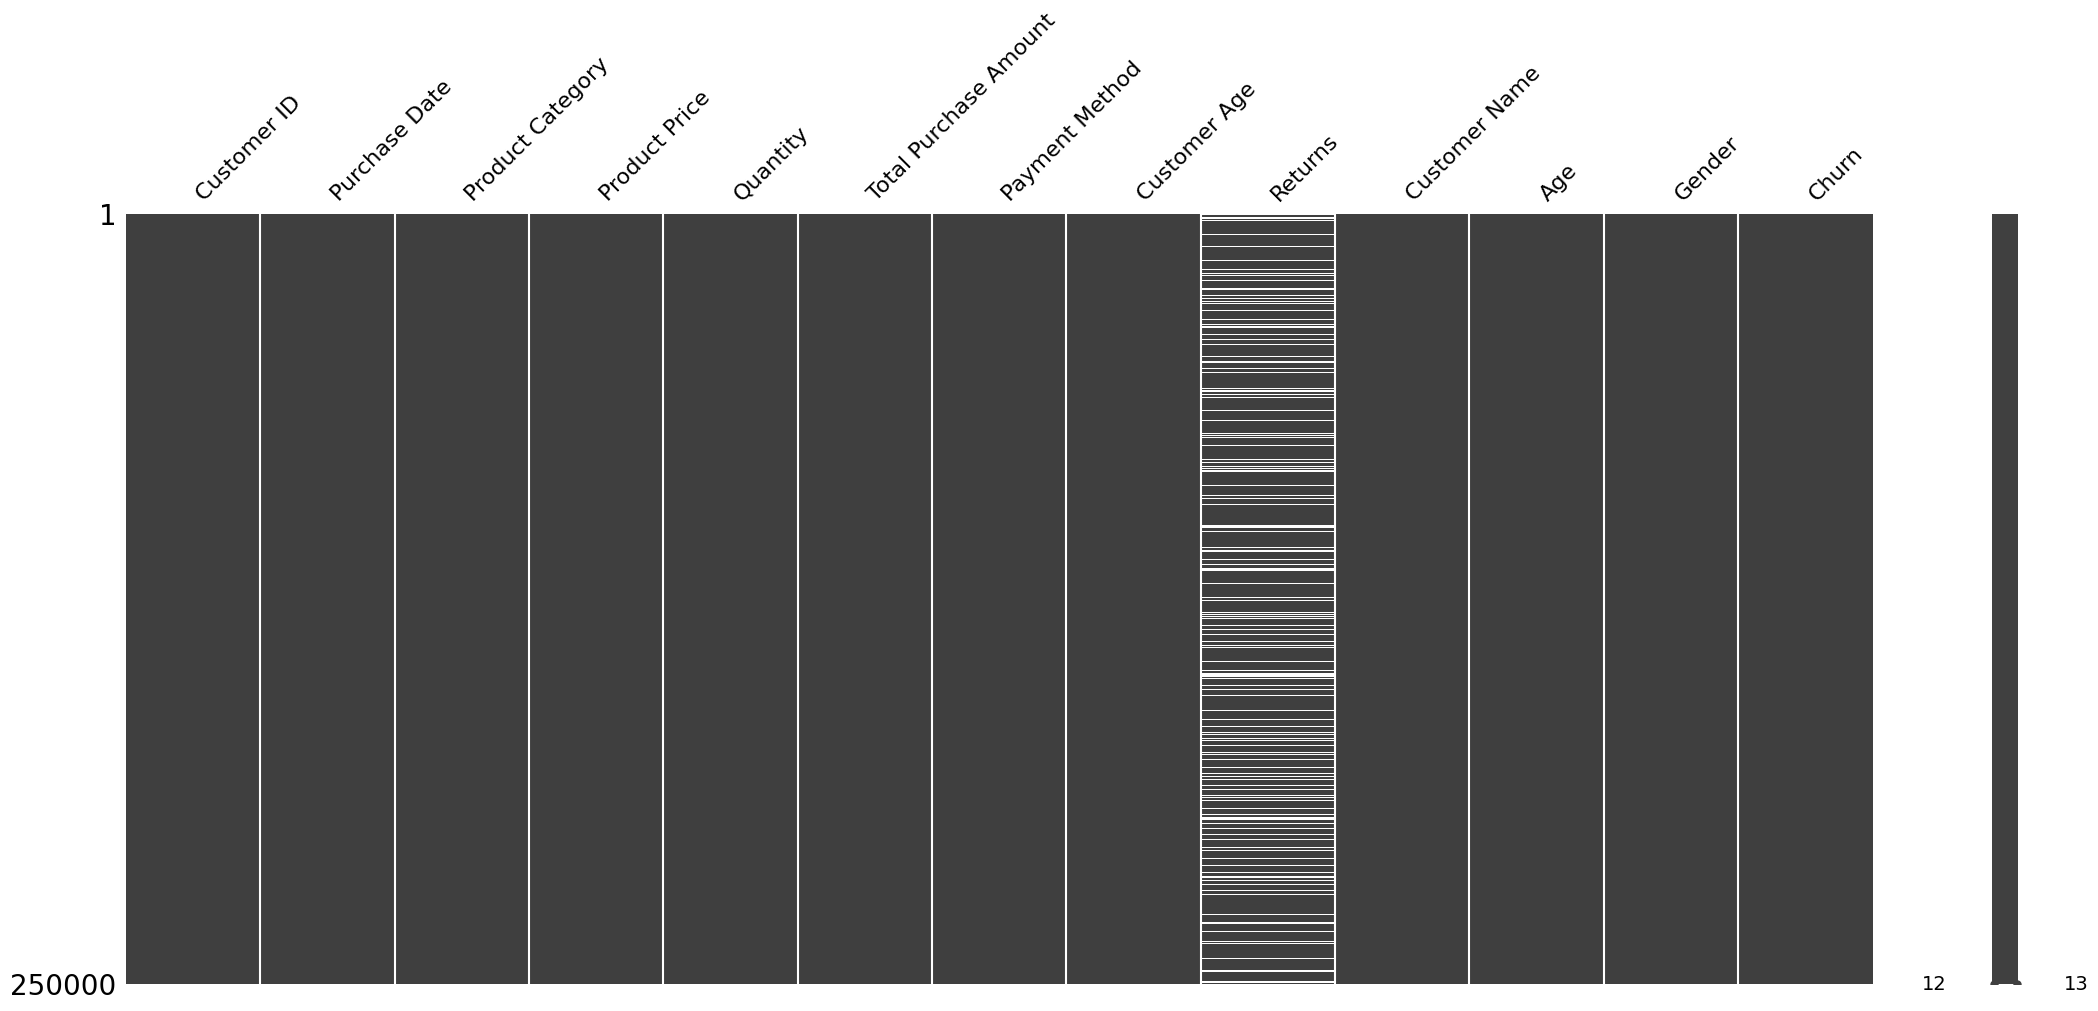

In [13]:
msno.matrix(df)

Sabemos agora que dados nulos aparecem ao longo de todo o período. O que isso significa? 

Isso significa que podemos remover todas as linhas que possuem dados nulos sempre que quisermos ter alguma métrica que tenha a ver com a coluna "Returns"

- Abaixo analisamos um pouco apenas os dados nulos

In [14]:
dados_nulos = df[['Returns']]
dados_nulos.head(n=2)

,Returns
0,1.0
1,1.0


In [15]:
print(dados_nulos.dtypes)
print(dados_nulos.value_counts())

Returns    float64
dtype: object
Returns
1.0        101476
0.0        101142
Name: count, dtype: int64


## 3.0 Métricas e visualização

In [31]:
colunas_categoricas = df.select_dtypes('category')#.columns.to_list()
colunas_numericas = df.drop('Customer ID', axis=1).select_dtypes('number')#.columns.to_list()

### Aplicando `describe()`

In [32]:
colunas_numericas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Product Price,250000.0,254.742724,141.738104,10.0,132.0,255.0,377.0,500.0
Quantity,250000.0,3.004936,1.414737,1.0,2.0,3.0,4.0,5.0
Total Purchase Amount,250000.0,2725.385196,1442.576095,100.0,1476.0,2725.0,3975.0,5350.0
Customer Age,250000.0,43.798276,15.364915,18.0,30.0,44.0,57.0,70.0
Returns,202618.0,0.500824,0.500001,0.0,0.0,1.0,1.0,1.0
Age,250000.0,43.798276,15.364915,18.0,30.0,44.0,57.0,70.0
Churn,250000.0,0.200520,0.400390,0.0,0.0,0.0,0.0,1.0


In [33]:
colunas_categoricas.describe().transpose()

,count,unique,top,freq
Product Category,250000,4,Electronics,62630
Payment Method,250000,3,Credit Card,83547
Customer Name,250000,39878,Michael Johnson,119
Gender,250000,2,Male,125676


### Distribuição dos valores

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Pytho

<Axes: xlabel='Payment Method', ylabel='count'>

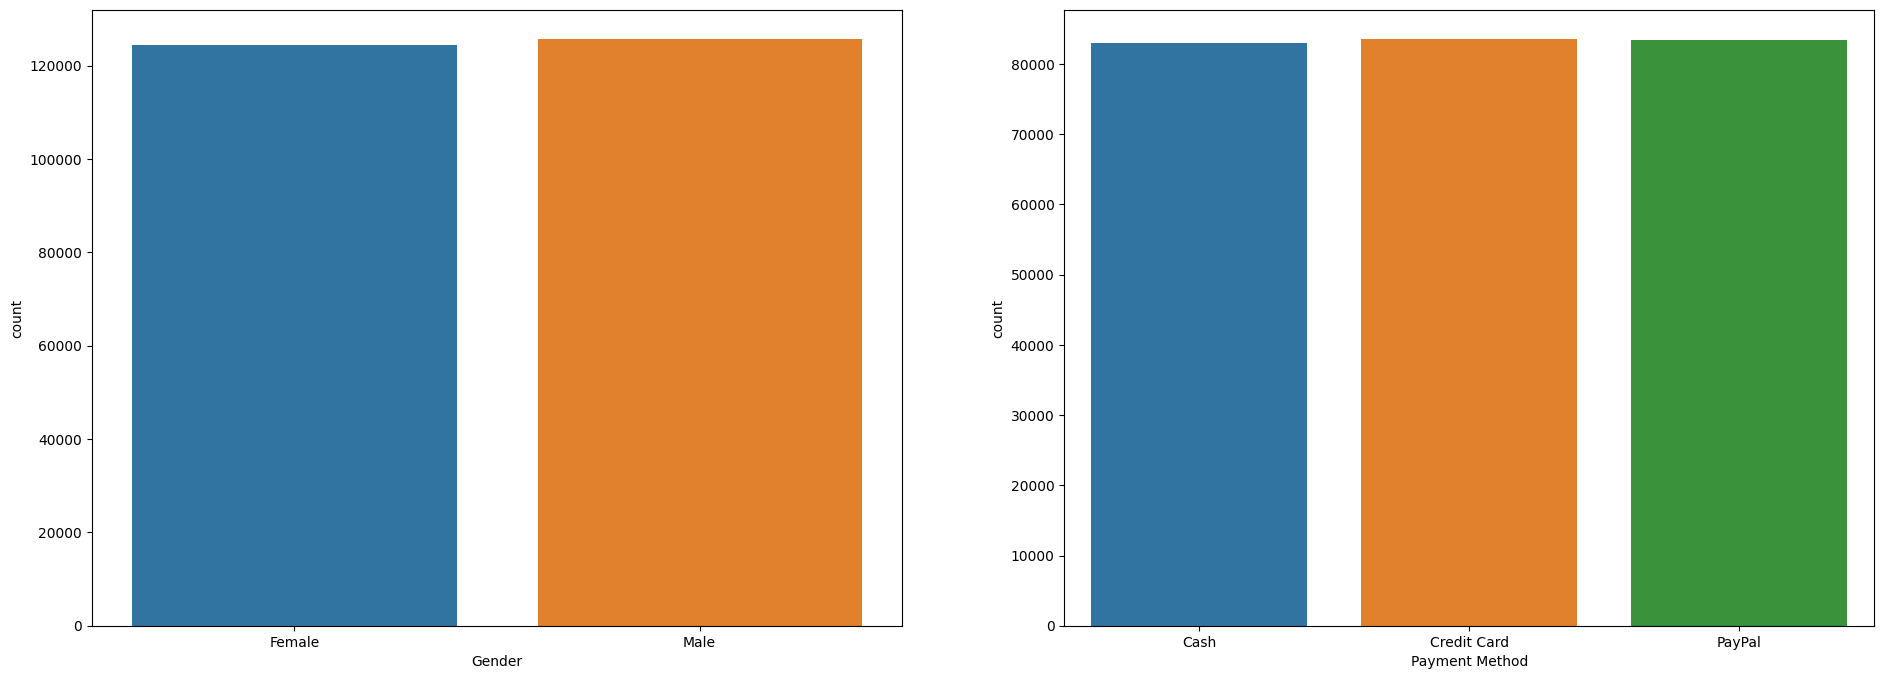

In [53]:
plt.rc('figure', figsize=(23, 8))
fig, axes = plt.subplots(1, 2)

sns.countplot(ax=axes[0], x='Gender', data=df)
sns.countplot(ax=axes[1], x='Payment Method', data=df)

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Product Category', ylabel='count'>

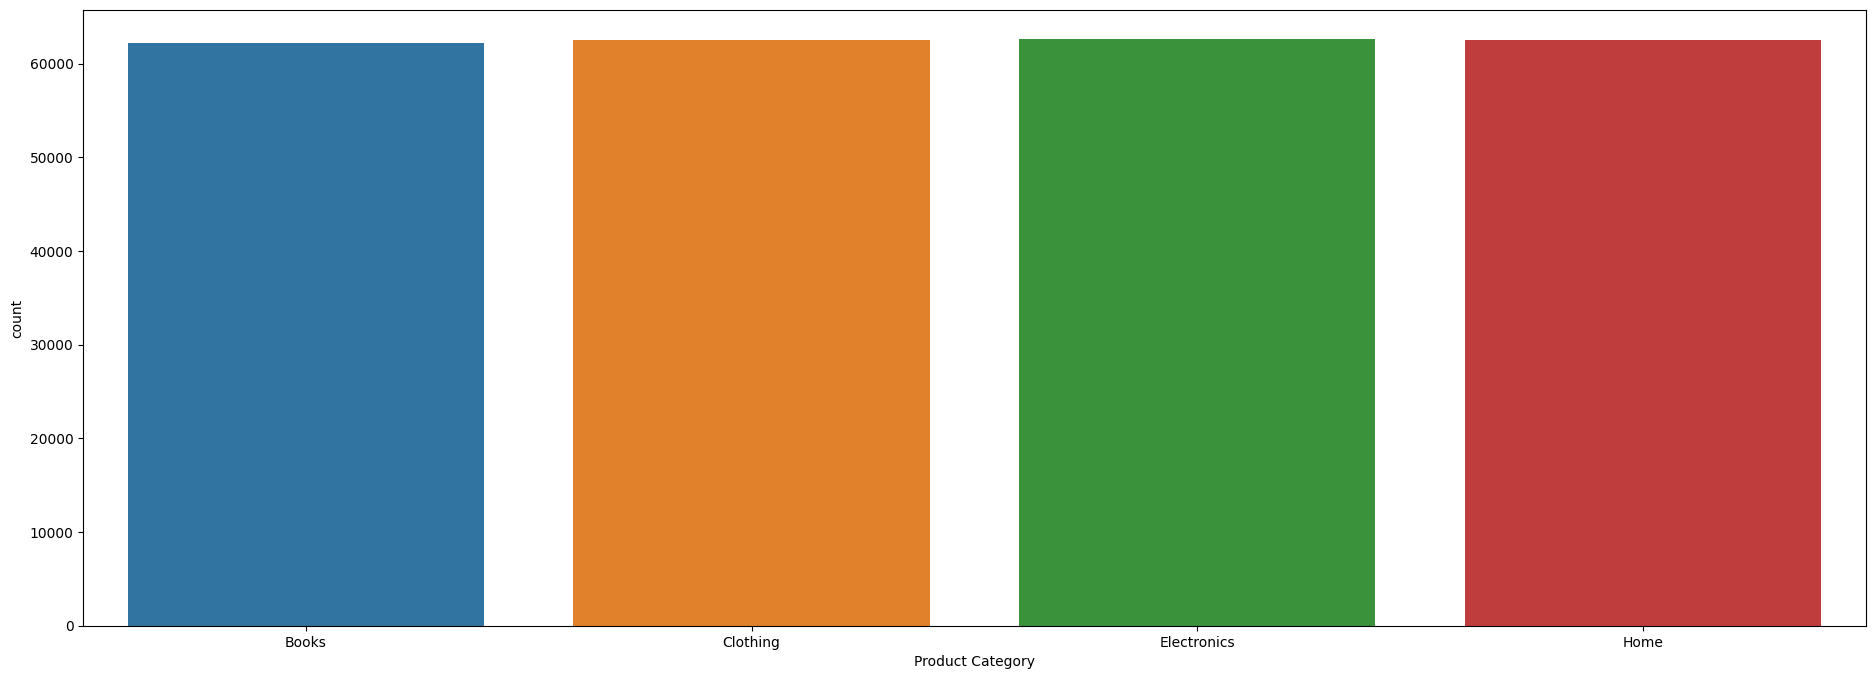

In [52]:
sns.countplot(x='Product Category', data=df)

### Outliers 

In [56]:
colunas_numericas.columns

Index(['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age',
       'Returns', 'Age', 'Churn'],
      dtype='object')

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Customer Age'>

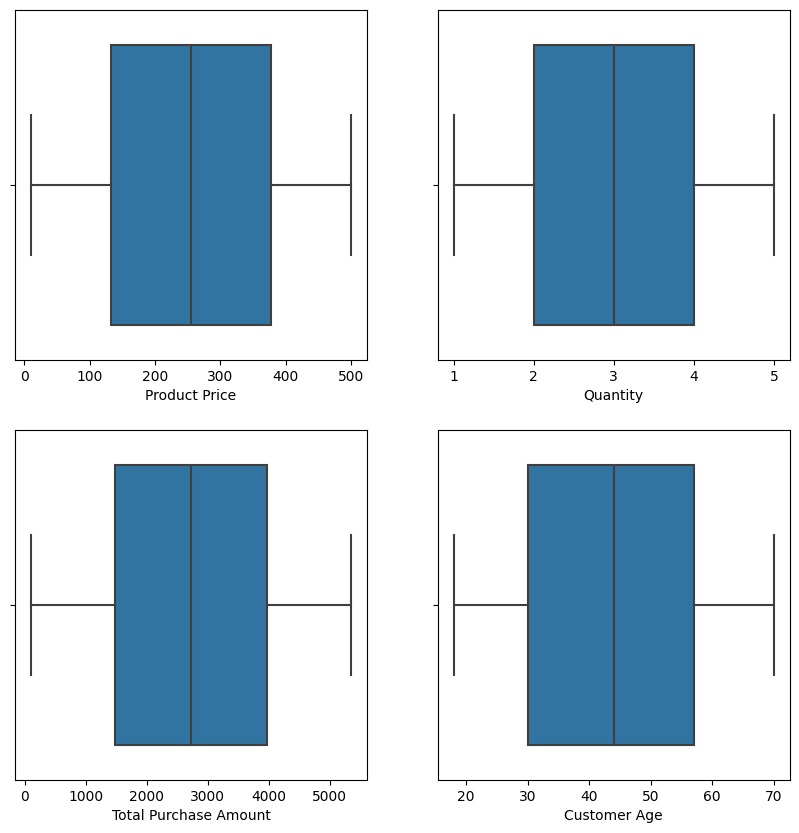

In [60]:
plt.close('all')
plt.rc('figure', figsize=(10, 10))
fig, axes = plt.subplots(2, 2)

sns.boxplot(ax = axes[0, 0], x='Product Price', data=df)
sns.boxplot(ax = axes[0, 1], x='Quantity', data=df)
sns.boxplot(ax = axes[1, 0], x='Total Purchase Amount', data=df)
sns.boxplot(ax = axes[1, 1], x='Customer Age', data=df)

---

### **`Perguntas`**

<ol type="1">
  <li>Carregamento dos dados e dos pacotes</li>
</ol>

Se quiser acessar as respostas dessas perguntas vá para o próximo projeto: [Análise completa]()

##

<p align="center">
  Enzo Schitini
</p>

<p align="center">
  Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator
</p>